# Fitting a linear regression model that predicts the 2008 relative vote share of the Republican party 

In [150]:
# Library imports needed for analysis conducted and visual graphs.

from string import ascii_letters
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline



In [151]:
from statsmodels.regression import linear_model
from scipy import special

In [152]:
# Dataframes created from CSV files 

datacsv= pd.read_csv('data_clean.csv')
votescsv= pd.read_csv('votes_clean.csv')

In [153]:
# Merge dataframes into one.

df = pd.merge(datacsv, votescsv, on='Fips', how='left')
df.head()

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Republicans 08 (Votes),Republicans 12 (Votes),votes16_trumpd,votes16_clintonh,Democrats08_Voteshare,Republicans08_Voteshare,Democrats12_Voteshare,Republicans12_Voteshare,Democrats16_Voteshare,Republicans16_Voteshare
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,3860.0,3887.0,3967.0,2364.0,0.402292,0.597708,0.403560,0.596440,0.373401,0.626599
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,3972.0,4263.0,4917.0,1587.0,0.350556,0.649444,0.329928,0.670072,0.244004,0.755996
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,3916.0,4136.0,4353.0,1544.0,0.330713,0.669287,0.308477,0.691523,0.261828,0.738172
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,8181.0,9411.0,8153.0,12652.0,0.617209,0.382791,0.576138,0.423862,0.608123,0.391877
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,5543.0,5214.0,5021.0,1836.0,0.318874,0.681126,0.318966,0.681034,0.267756,0.732244


In [154]:
# Find correlations to help select which variables we are using for our models. 
df_corr =df.corr()

In [155]:
# Create a visiual graph to help.
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [156]:
# Generate a custom diverging colormap
corr_visual = sns.diverging_palette(220, 10, as_cmap=True)

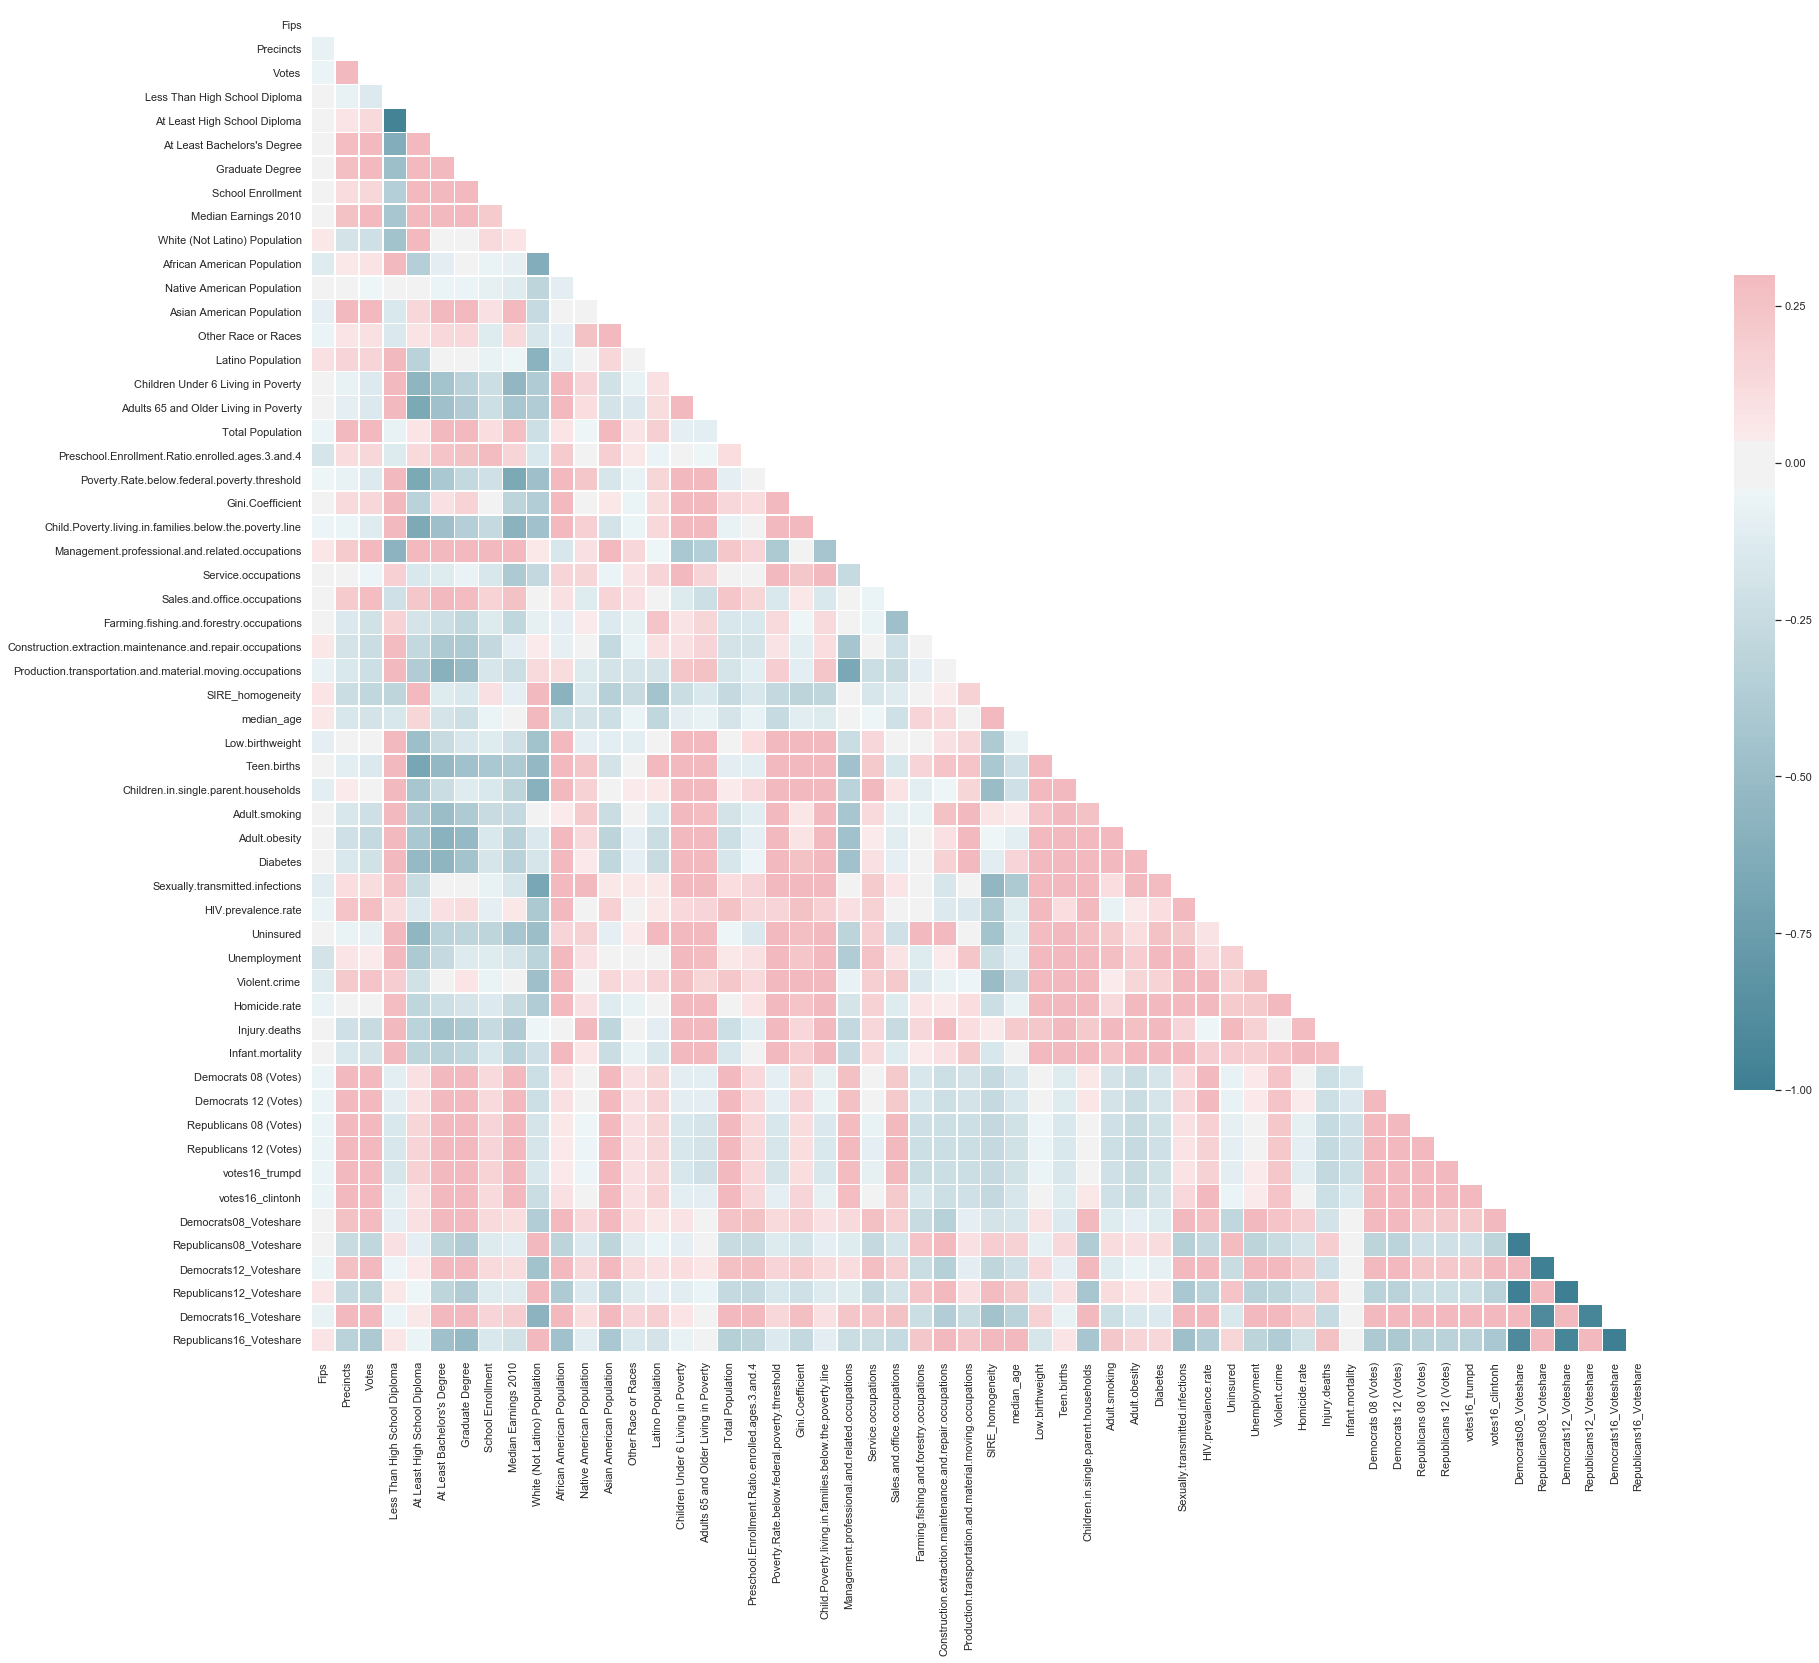

In [157]:

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=corr_visual, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [158]:
# To remember what the columns are, we can use this code below to show us the index names.
df.columns

Index(['State', 'ST', 'Fips', 'County', 'Precincts', 'Votes',
       'Less Than High School Diploma', 'At Least High School Diploma',
       'At Least Bachelors's Degree', 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'White (Not Latino) Population',
       'African American Population', 'Native American Population',
       'Asian American Population', 'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.tran

In [159]:
# Create arrays to hold our column variables and Republican 08 Voteshare
X = df
y = df['Republicans08_Voteshare'].values

In [160]:
y

array([0.59770827, 0.64944408, 0.6692873 , ..., 0.40921687, 0.56080586,
       0.88040913])

The independant variables below were picked by myself out of curiousity. I wanted to use samples of the population that vote for particular parties. For the model below, teen births has a high republican correlation, along with construction and most blue collar jobs. The Democratic party sees many graduates voting for them, same with management professionals. 

In [161]:
# Add constant variables to receive the correct r-squared. 
# X1 holds all my independant variables 
# y holds my dependant variabe 
X1 = sm.add_constant(X[['Teen.births', 'Management.professional.and.related.occupations',
                                    'At Least High School Diploma','Construction.extraction.maintenance.and.repair.occupations', 
                                    'Graduate Degree']])
# Fit the model
my_linreg = linear_model.OLS(y, X1).fit()

# Find r-squared, look at p-values
my_linreg.summary()

/Users/andres/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sun, 21 Jul 2019   Prob (F-statistic):          1.53e-184
Time:                        15:21:29   Log-Likelihood:                 2143.3
No. Observations:                3141   AIC:                            -4275.
Df Residuals:                    3135   BIC:                            -4238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          0.1916      0.040      4.734      0.000       0.112       0.271
Teen.births                                                    0.0003      0.000      2.069      0.039    1.68e-05       0.001
Management.professional.and.related.occupations                0.0068      0.001     13.377      0.000       0.006       0.008
At Least High School Diploma                                   0.0016      0.000      3.847      0.000       0.001       0.002
Construction.extraction.maintenance.and.repair.occupations     0.0127      0.001     17.503      0.000       0.011       0.014
Graduate Degree                                               -0.0176      0.001    -21.909      0.000      -0.019      -0.016
==============================================================================
Omnibus:                       78.672   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.160
Skew:                          -0.362   Prob(JB):                     1.18e-19
Kurtosis:                       3.378   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analysis

The p-value and r-squared are very low and can be improved by adding more variables. My hypothesis regarding the variables used would not be sufficient to create an accurate model through `Linear Regression`. 

My approach for selecting the constant variables below is the following. Instead of using the majority of our data on a linear regression, I wanted to focus on what the story that the data tells. The data we have been using reflects which who is voting for what party. There are many variables in our table that correlate with eachother, which is why I find it more meaningful to create a model that uses demographic data. Adding to the fact that having lots of features in your model can result in a poorly defined one. 



In [162]:
# X2 holds my new independant variables
X2 = sm.add_constant(X[[ 'Less Than High School Diploma', 'At Least High School Diploma',
       "At Least Bachelors's Degree", 'Graduate Degree', 'School Enrollment',
       'Median Earnings 2010', 'White (Not Latino) Population',
       'African American Population', 'Native American Population',
       'Asian American Population', 'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Farming.fishing.and.forestry.occupations',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes', 'Sexually.transmitted.infections',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Homicide.rate', 'Injury.deaths', 'Infant.mortality',
     ]])
my_linreg1 = linear_model.OLS(y, X2).fit()

In [163]:
my_linreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:21:29   Log-Likelihood:                 3447.0
No. Observations:                3141   AIC:                            -6810.
Df Residuals:                    3099   BIC:                            -6556.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          1.1353      4.143      0.274      0.784      -6.988       9.258
Less Than High School Diploma                                 -0.0006      0.001     -0.647      0.518      -0.002       0.001
At Least High School Diploma                                  -0.0009      0.001     -1.068      0.286      -0.002       0.001
At Least Bachelors's Degree                                   -0.0026      0.001     -3.939      0.000      -0.004      -0.001
Graduate Degree                                               -0.0069      0.001     -6.039      0.000      -0.009      -0.005
School Enrollment                                              0.0005      0.000      1.287      0.198      -0.000       0.001
Median Earnings 2010                                       -9.783e-07   5.63e-07     -1.736      0.083   -2.08e-06    1.27e-07
White (Not Latino) Population                                 -0.0047      0.030     -0.156      0.876      -0.063       0.054
African American Population                                   -0.0103      0.030     -0.344      0.731      -0.069       0.048
Native American Population                                    -0.0110      0.030     -0.368      0.713      -0.070       0.048
Asian American Population                                     -0.0110      0.030     -0.366      0.714      -0.070       0.048
Other Race or Races                                           -0.0127      0.030     -0.422      0.673      -0.072       0.046
Latino Population                                             -0.0099      0.030     -0.331      0.741      -0.069       0.049
Children Under 6 Living in Poverty                            -0.0005      0.000     -1.686      0.092      -0.001    7.73e-05
Adults 65 and Older Living in Poverty                          0.0002      0.000      0.447      0.655      -0.001       0.001
Total Population                                           -2.616e-08   5.71e-09     -4.580      0.000   -3.74e-08    -1.5e-08
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4            -4.85e-06      0.000     -0.043      0.966      -0.000       0.000
Poverty.Rate.below.federal.poverty.threshold                  -0.0057      0.001     -5.870      0.000      -0.008      -0.004
Gini.Coefficient                                               0.1197      0.060      1.985      0.047       0.001       0.238
Child.Poverty.living.in.families.below.the.poverty.line        0.0018      0.001      3.033      0.002       0.001       0.003
Management.professional.and.related.occupations                0.0072      0.029      0.251      0.802      -0.049       0.064
Service.occupations                

### Observation
A few high p-values in the model
* `Adults 65 and Older Living in Poverty`.
* Every Poputlation in our data.
* Job categories as well.
* `Sexually.transmitted.infections`.
* `Construction.extraction.maintenance.and.repair.occupations`.

A lot of them are correlated with another, which is why 
I will remove one by run as they might be correlated with one another.

In [164]:
# New list of constant models which was taken after removing the p-values one by one. 

X3 = sm.add_constant(X[[ 'At Least High School Diploma',
       "At Least Bachelors's Degree", 'Graduate Degree', 
       'Median Earnings 2010', 
       'African American Population', 'Native American Population',
       'Asian American Population', 'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Total Population',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professional.and.related.occupations',
       'Service.occupations', 'Sales.and.office.occupations',
       'Production.transportation.and.material.moving.occupations',
       'SIRE_homogeneity', 'median_age', 'Low.birthweight', 'Teen.births',
       'Children.in.single.parent.households', 'Adult.smoking',
       'Adult.obesity', 'Diabetes',
       'HIV.prevalence.rate', 'Uninsured', 'Unemployment', 'Violent.crime',
       'Homicide.rate', 'Injury.deaths', 'Infant.mortality']])
my_linreg2 = linear_model.OLS(y, X3).fit()

my_linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:21:29   Log-Likelihood:                 3445.3
No. Observations:                3141   AIC:                            -6823.
Df Residuals:                    3107   BIC:                            -6617.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         1.2479      0.071     17.618      0.000       1.109       1.387
At Least High School Diploma                                 -0.0004      0.000     -1.020      0.308      -0.001       0.000
At Least Bachelors's Degree                                  -0.0027      0.001     -3.972      0.000      -0.004      -0.001
Graduate Degree                                              -0.0069      0.001     -6.139      0.000      -0.009      -0.005
Median Earnings 2010                                      -9.048e-07    5.3e-07     -1.708      0.088   -1.94e-06    1.34e-07
African American Population                                  -0.0058      0.000    -20.878      0.000      -0.006      -0.005
Native American Population                                   -0.0065      0.000    -22.476      0.000      -0.007      -0.006
Asian American Population                                    -0.0064      0.001     -7.395      0.000      -0.008      -0.005
Other Race or Races                                          -0.0080      0.001     -8.153      0.000      -0.010      -0.006
Latino Population                                            -0.0052      0.000    -25.171      0.000      -0.006      -0.005
Children Under 6 Living in Poverty                           -0.0005      0.000     -1.719      0.086      -0.001    6.75e-05
Total Population                                          -2.629e-08   5.69e-09     -4.622      0.000   -3.74e-08   -1.51e-08
Poverty.Rate.below.federal.poverty.threshold                 -0.0054      0.001     -6.315      0.000      -0.007      -0.004
Gini.Coefficient                                              0.1185      0.059      2.001      0.045       0.002       0.235
Child.Poverty.living.in.families.below.the.poverty.line       0.0017      0.001      2.924      0.003       0.001       0.003
Management.professional.and.related.occupations               0.0013      0.001      2.257      0.024       0.000       0.003
Service.occupations                                          -0.0057      0.001     -8.568      0.000      -0.007      -0.004
Sales.and.office.occupations                                 -0.0012      0.001     -1.951      0.051      -0.002       6e-06
Production.transportation.and.material.moving.occupations    -0.0044      0.001     -8.332      0.000      -0.005      -0.003
SIRE_homogeneity                                             -0.2742      0.019    -14.727      0.000      -0.311      -0.238
median_age                                                   -0.0060      0.000    -12.627      0.000      -0.007      -0.005
Low.birthweight                                            

I expcted the r-squared to improve after removing a few columns of data. However it stayed the same, it will be pretty hard to increase the r-squared by using the rest of our features. Let's plot the data below to get a better idea of our model

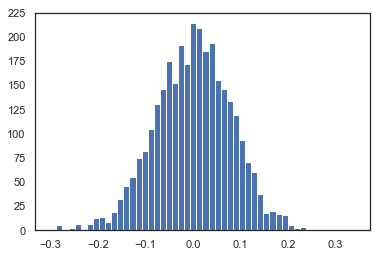

In [165]:
lr_resids = my_linreg2.resid
plt.figure()
plt.hist(lr_resids, bins = 50)
plt.show()

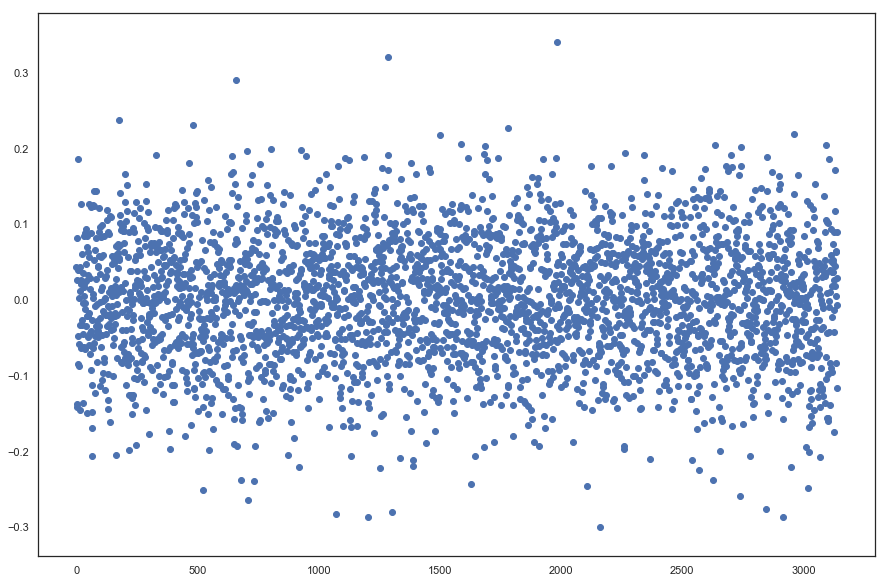

In [169]:
plt.figure(figsize=(15,10))
plt.scatter(range(len(my_linreg2.resid)),my_linreg2.resid)
plt.show()

In [170]:
# These are my data points,x being county, y being predictions success rate for each.
linpredict = my_linreg2.predict(X3)
linpredict

0       0.554254
1       0.787801
2       0.643516
3       0.524115
4       0.600253
5       0.180708
6       0.426047
7       0.794232
8       0.632510
9       0.663849
10      0.198764
11      0.499837
12      0.540212
13      0.540133
14      0.463969
15      0.473942
16      0.405545
17      0.500415
18      0.484029
19      0.679991
20      0.615449
21      0.509069
22      0.619190
23      0.685586
24      0.498058
25      0.536045
26      0.637987
27      0.553707
28      0.499625
29      0.532331
          ...   
3111    0.610391
3112    0.369305
3113    0.410989
3114    0.553458
3115    0.403317
3116    0.518127
3117    0.508176
3118    0.601642
3119    0.718210
3120    0.762917
3121    0.720919
3122    0.668963
3123    0.685576
3124    0.673253
3125    0.341066
3126    0.662736
3127    0.555653
3128    0.595570
3129    0.743686
3130    0.581315
3131    0.745992
3132    0.590678
3133    0.522429
3134    0.454784
3135    0.392711
3136    0.551326
3137    0.607268
3138    0.5264

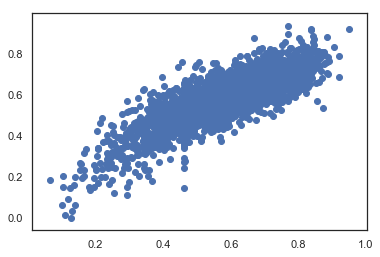

In [171]:
# Plot the predictions
plt.figure()
plt.scatter(y, linpredict)
plt.show()

There is a linear pattern

In [175]:
covar = np.cov(y,linpredict)
correl = np.corrcoef(y,linpredict)

print("This is the covariance: \n",covar)

print(f'This is the correlation: \n {correl}')


This is the covariance: 
 [[0.01970677 0.0131766 ]
 [0.0131766  0.0131766 ]]
This is the correlation: 
 [[1.         0.81769996]
 [0.81769996 1.        ]]


In [179]:
stats.pearsonr(y,linpredict)

(0.8176999607825738, 0.0)

In [180]:
slope, intercept, rval, pval, stere = stats.linregress(y,linpredict)

In [181]:
slope

0.668633225864176

In [182]:
intercept

0.1909863792017007

In [183]:
# Data used
dataX = print(X[['Teen.births', 'Management.professional.and.related.occupations','At Least High School Diploma',  
         'Construction.extraction.maintenance.and.repair.occupations', 'Graduate Degree']])
lingregvariables = print(dataX, y)

      Teen.births  Management.professional.and.related.occupations  \
0       47.700000                                            28.35   
1       49.000000                                            25.15   
2       54.100000                                            21.60   
3       41.300000                                            32.90   
4       64.000000                                            26.15   
5       62.200000                                            24.75   
6       24.800000                                            40.10   
7       45.900000                                            30.95   
8       67.700000                                            30.90   
9       47.900000                                            28.25   
10      16.200000                                            50.60   
11      50.100000                                            28.65   
12      38.100000                                            33.00   
13      27.200000   

### Conclusion

This model has a pretty decent fit given its features. Using the visual aids, we can see that theres a normal distrubtion and variation of data to give us a decent linear regression. In order to interpret the model, we look at the r-squared measumrent to see the goodness of fit by measuring the percentage of variance between the X and Y variables.  In other words the strength of the model. In my case being at `66%.`

# Fitting a logistic regression model using the same demographic data to predict which political party will take the majority of a county’s votes. 

In [107]:

# lets make a new y column to represent a true and fale, or 1,0, for logistc regression

rep08 = y

# now we can create a new column named y_binary 
# set y to 1 if it is greater than the mean, set to 0 if it is less

y_binary = np.where(.50 > rep08, 0, 1)
# should give us an array of 1s and 0s corresponding to whether y is greater or smaller than the mean

In [108]:
# lets make sure our new y values match up with the original values
# we can put them into a dataframe
# but first we have to convert the y_binary into a series
y_binary = pd.Series(y_binary)

In [109]:
y_binary

0       1
1       1
2       1
3       0
4       1
5       0
6       0
7       1
8       1
9       1
10      0
11      1
12      0
13      0
14      1
15      0
16      0
17      1
18      0
19      1
20      1
21      0
22      1
23      1
24      1
25      0
26      1
27      1
28      0
29      1
       ..
3111    0
3112    0
3113    0
3114    0
3115    0
3116    1
3117    0
3118    1
3119    1
3120    1
3121    1
3122    1
3123    1
3124    1
3125    0
3126    1
3127    1
3128    0
3129    1
3130    1
3131    1
3132    1
3133    0
3134    0
3135    0
3136    1
3137    1
3138    0
3139    1
3140    1
Length: 3141, dtype: int64

In [110]:
# Combine our series into a dataframe by feeding a dictionary
y_compare=pd.DataFrame(dict(y_binary = y_binary, y = y))
y_compare.head(20)

,y_binary,y
0,1,0.597708
1,1,0.649444
2,1,0.669287
3,0,0.382791
4,1,0.681126
5,0,0.366990
6,0,0.341310
7,1,0.746309
8,1,0.671744
9,1,0.666612


I chose the original variables from question 1 because I still belive that you don't need many variables to create a semi-accurate model. 

In [111]:
X1 = df[['Teen.births', 'Management.professional.and.related.occupations','At Least High School Diploma',  
         'Construction.extraction.maintenance.and.repair.occupations', 'Graduate Degree']]

In [112]:
# Create an logistic regression instance with our data.
logit = sm.Logit(y_binary, X1);

# Fit the model to the data (this returns a seperate object with the parameters)
logreg1 = logit.fit();

# predict will output a probability between 0 and 1.
prediction = np.where(logreg1.predict(X1) >= 0.5, 1,0)

# now we can calculate how many correct predictions our model output
total_correct = np.where(prediction==y_binary,1,0).sum()

# and our accuracy as a percentage
percentage_correct = (total_correct/len(y_binary))*100

# print 
print(total_correct, "out of", len(y), "correct.")

print(f' Our model is {percentage_correct}% accurate')

Optimization terminated successfully.
         Current function value: 0.519710
         Iterations 6
2398 out of 3141 correct.
 Our model is 76.34511302133079% accurate


In [113]:
logreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3141
Model:                          Logit   Df Residuals:                     3136
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Jul 2019   Pseudo R-squ.:                  0.1349
Time:                        15:34:53   Log-Likelihood:                -1632.4
converged:                       True   LL-Null:                       -1887.0
                                        LLR p-value:                7.187e-109
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Teen.births                                                   -0.0067      0.002     -3.037      0.002      -0.011      -0.002
Management.professional.and.related.occupations                0.0646      0.011      5.766      0.000       0.043       0.087
At Least High School Diploma                                  -0.0126      0.004     -2.812      0.005      -0.021      -0.004
Construction.extraction.maintenance.and.repair.occupations     0.1747      0.016     10.759      0.000       0.143       0.207
Graduate Degree                                               -0.2405      0.018    -13.040      0.000      -0.277      -0.204
==============================================================================================================================
"""


# Now build new models to predict the 2012 and 2016 relative vote share of the Republican party, respectively. How does each of their performances compare to your 2008 model from question 4.1?

To see the difference between elections, I will be using the Logistic Regression models with the same X constant variables for 2012 and 2016. I chose a logistic model instead of a linear for 2012 and 2016 because it makes more sense using a binary factor as a predictor for Republican voteshare. 

In [139]:
# Constants 
X1.columns

Index(['Teen.births', 'Management.professional.and.related.occupations',
       'At Least High School Diploma',
       'Construction.extraction.maintenance.and.repair.occupations',
       'Graduate Degree'],
      dtype='object')

# 2012 Model

In [123]:
# lets make a new y column to represent 2012 Rep Votesshares as a true and fale, or 1,0, for logistc regression

y1 = df['Republicans12_Voteshare']
rep12 = y1

# now we can create a new column named y_binary 
# set y to 1 if it is greater than the mean, set to 0 if it is less

y_binary12 = np.where(.50 > rep12, 0, 1)
# should give us an array of 1s and 0s corresponding to whether y is greater or smaller than the mean

In [124]:
# lets make sure our new y values match up with the original values
# we can put them into a dataframe
# but first we have to convert the y_binary into a series
y_binary12 = pd.Series(y_binary12)

In [125]:
y_compare12=pd.DataFrame(dict(y_binary12 = y_binary12, y = y1))
y_compare12.head(20)

,y_binary12,y
0,1,0.596440
1,1,0.670072
2,1,0.691523
3,0,0.423862
4,1,0.681034
5,0,0.337008
6,0,0.352010
7,1,0.779540
8,1,0.680143
9,1,0.690295


In [134]:
# Create an logistic regression instance with our data.
logit2 = sm.Logit(y_binary12, X1);

# Fit the model to the data (this returns a seperate object with the parameters)
logreg2 = logit2.fit();

# .predict will output a probability between 0 and 1.
prediction2 = np.where(logreg2.predict(X1) >= 0.5, 1,0)

# now we can calculate how many correct predictions our model output
total_correct2 = np.where(prediction2==y_binary12,1,0).sum()

# and our accuracy as a percentage
percentage_correct2 = (total_correct2/len(y_binary12))*100

#print 
print(total_correct2, "out of", len(y), "correct.")

print(f' Our model is {percentage_correct2}% accurate')

Optimization terminated successfully.
         Current function value: 0.452103
         Iterations 6
2525 out of 3141 correct.
 Our model is 80.38841133397008% accurate


In [144]:
logreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3141
Model:                          Logit   Df Residuals:                     3136
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Jul 2019   Pseudo R-squ.:                  0.1626
Time:                        17:08:00   Log-Likelihood:                -1420.1
converged:                       True   LL-Null:                       -1695.8
                                        LLR p-value:                5.057e-118
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Teen.births                                                   -0.0189      0.002     -7.932      0.000      -0.024      -0.014
Management.professional.and.related.occupations                0.0502      0.012      4.140      0.000       0.026       0.074
At Least High School Diploma                                   0.0052      0.005      1.086      0.277      -0.004       0.015
Construction.extraction.maintenance.and.repair.occupations     0.1859      0.018     10.352      0.000       0.151       0.221
Graduate Degree                                               -0.2787      0.020    -13.747      0.000      -0.318      -0.239
==============================================================================================================================
"""

# 2016 Model

In [131]:
# lets make a new y column to represent 2012 Rep Votesshares as a true and fale, or 1,0, for logistc regression

y2 = df['Republicans16_Voteshare']
rep16 = y2

# now we can create a new column named y_binary 
# set y to 1 if it is greater than the mean, set to 0 if it is less

y_binary16 = np.where(.50 > rep16, 0, 1)
# should give us an array of 1s and 0s corresponding to whether y is greater or smaller than the mean

In [132]:
# lets make sure our new y values match up with the original values
# we can put them into a dataframe
# but first we have to convert the y_binary into a series
y_binary16 = pd.Series(y_binary16)

In [133]:
y_compare16=pd.DataFrame(dict(y_binary16 = y_binary16, y = y2))
y_compare16.head(20)

,y_binary16,y
0,1,0.626599
1,1,0.755996
2,1,0.738172
3,0,0.391877
4,1,0.732244
5,0,0.284065
6,0,0.300699
7,1,0.842684
8,1,0.749413
9,1,0.707063


In [136]:
# Create an logistic regression instance with our data.
logit3 = sm.Logit(y_binary16, X1);

# Fit the model to the data (this returns a seperate object with the parameters)
logreg3 = logit3.fit();

# .predict will output a probability between 0 and 1.
prediction3 = np.where(logreg3.predict(X1) >= 0.5, 1,0)

# now we can calculate how many correct predictions our model output
total_correct3 = np.where(prediction3==y_binary16,1,0).sum()

# and our accuracy as a percentage
percentage_correct3 = (total_correct3/len(y_binary16))*100

#print 
print(total_correct3, "out of", len(y), "correct.")

print(f' Our model is {percentage_correct3}% accurate')

Optimization terminated successfully.
         Current function value: 0.319267
         Iterations 7
2743 out of 3141 correct.
 Our model is 87.32887615409105% accurate


In [145]:
logreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3141
Model:                          Logit   Df Residuals:                     3136
Method:                           MLE   Df Model:                            4
Date:                Sat, 20 Jul 2019   Pseudo R-squ.:                  0.2869
Time:                        17:08:21   Log-Likelihood:                -1002.8
converged:                       True   LL-Null:                       -1406.3
                                        LLR p-value:                2.322e-173
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Teen.births                                                   -0.0364      0.003    -12.226      0.000      -0.042      -0.031
Management.professional.and.related.occupations                0.0389      0.015      2.526      0.012       0.009       0.069
At Least High School Diploma                                   0.0480      0.006      7.913      0.000       0.036       0.060
Construction.extraction.maintenance.and.repair.occupations     0.1440      0.021      6.956      0.000       0.103       0.185
Graduate Degree                                               -0.4667      0.028    -16.641      0.000      -0.522      -0.412
==============================================================================================================================
"""

### Conclusion

In [143]:
print('2008 Model Predictions')
print(total_correct, "out of", len(y), "correct.")
print(f' Our model is {percentage_correct}% accurate')
print('\n')
print('2012 Model Predictions')
print(total_correct2, "out of", len(y), "correct.")
print(f' Our model is {percentage_correct2}% accurate')
print('\n')
print('2016 Model Predictions')
print(total_correct3, "out of", len(y), "correct.")
print(f' Our model is {percentage_correct3}% accurate')

2008 Model Predictions
2398 out of 3141 correct.
 Our model is 76.34511302133079% accurate


2012 Model Predictions
2525 out of 3141 correct.
 Our model is 80.38841133397008% accurate


2016 Model Predictions
2743 out of 3141 correct.
 Our model is 87.32887615409105% accurate


Quickly glancing over the accuracy ratings for models with X1 constants, shows that percentage increases after each election, and more so for 2016. Reason being my variables have a high correlation with Republican vote shares, and given our data for 2016, we know that vote distrubtion for counties skewed toward Republicans, increasing the accuracy of the 2016 model predictions. To increase accuracy for previous models, 2008 and 2012, I can add X constants that correlate with Democratic vote shares. Comparing 2012 + 2016 models to 2008, it looks like my model is better fit during politcal climates that have the majority of the population leaning right. Or in this case, when the majority of the population would rather elect a Republican president.  

With simple optimization, the model could represent better predictions with new varaibles that correlate with Democratic voters. The key would be not too over saturate the model with variables, or else it will be hard to explain why your model works, hence the reason I selected only 5 features for my models.